In [2]:
"""
Created on Mon Sep 16 09:47:15 2019
@author: daniel
"""
import numpy as np
import matplotlib.pyplot as plt


def fractal_dimension(array, max_box_size=None, min_box_size=1, n_samples=20, n_offsets=0, plot=False):
    """Calculates the fractal dimension of a 3D numpy array.

    Args:
        array (np.ndarray): The array to calculate the fractal dimension of.
        max_box_size (int): The largest box size, given as the power of 2 so that
                            2**max_box_size gives the sidelength of the largest box.
        min_box_size (int): The smallest box size, given as the power of 2 so that
                            2**min_box_size gives the sidelength of the smallest box.
                            Default value 1.
        n_samples (int): number of scales to measure over.
        n_offsets (int): number of offsets to search over to find the smallest set N(s) to
                       cover  all voxels>0.
        plot (bool): set to true to see the analytical plot of a calculation.


    """
    # determine the scales to measure on
    if max_box_size == None:
        # default max size is the largest power of 2 that fits in the smallest dimension of the array:
        max_box_size = int(np.floor(np.log2(np.min(array.shape))))
    scales = np.floor(np.logspace(max_box_size, min_box_size, num=n_samples, base=2))
    scales = np.unique(scales)  # remove duplicates that could occur as a result of the floor

    # get the locations of all non-zero pixels
    locs = np.where(array > 0)
    voxels = np.array([(x, y, z) for x, y, z in zip(*locs)])

    # count the minimum amount of boxes touched
    Ns = []
    # loop over all scales
    for scale in scales:
        touched = []
        if n_offsets == 0:
            offsets = [0]
        else:
            offsets = np.linspace(0, scale, n_offsets)
        # search over all offsets
        for offset in offsets:
            bin_edges = [np.arange(0, i, scale) for i in array.shape]
            bin_edges = [np.hstack([0 - offset, x + offset]) for x in bin_edges]
            H1, e = np.histogramdd(voxels, bins=bin_edges)
            touched.append(np.sum(H1 > 0))
        Ns.append(touched)
    Ns = np.array(Ns)

    # From all sets N found, keep the smallest one at each scale
    Ns = Ns.min(axis=1)

    # Only keep scales at which Ns changed
    scales = np.array([np.min(scales[Ns == x]) for x in np.unique(Ns)])

    Ns = np.unique(Ns)
    Ns = Ns[Ns > 0]
    scales = scales[:len(Ns)]
    # perform fit
    coeffs = np.polyfit(np.log(1 / scales), np.log(Ns), 1)

    # make plot
    if plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(np.log(1 / scales), np.log(np.unique(Ns)), c="teal", label="Measured ratios")
        ax.set_ylabel("$\log N(\epsilon)$")
        ax.set_xlabel("$\log 1/ \epsilon$")
        fitted_y_vals = np.polyval(coeffs, np.log(1 / scales))
        ax.plot(np.log(1 / scales), fitted_y_vals, "k--", label=f"Fit: {np.round(coeffs[0], 3)}X+{coeffs[1]}")
        ax.legend();
    return (coeffs[0])


In [7]:
from lib.lib import read_xy_alt, read_load

full_data = read_load("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-3d", read_xy_alt)
df = full_data[full_data.run == '1']

In [18]:
max_actual_radius = max(df.x.abs().max(), df.y.abs().max(), df.z.abs().max())
max_radius = int(np.exp2(np.floor(np.log2(max_actual_radius)) + 1))
data = np.zeros((max_radius * 2, max_radius * 2, max_radius * 2))
data[df.x + max_radius, df.y + max_radius, df.z + max_radius] = 1

In [19]:
data.shape

(128, 128, 128)

In [20]:
data.sum()

5000.0

In [21]:
df.shape

(5000, 8)

In [28]:
dfs = []
for _, df in full_data.groupby('run'):
    max_actual_radius = max(df.x.abs().max(), df.y.abs().max(), df.z.abs().max())
    max_radius = int(np.exp2(np.floor(np.log2(max_actual_radius)) + 1))
    data = np.zeros((max_radius * 2, max_radius * 2, max_radius * 2))
    data[df.x + max_radius, df.y + max_radius, df.z + max_radius] = 1
    dfs.append(fractal_dimension(data))

In [31]:
np.array(dfs).mean()

1.8144806365770567

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


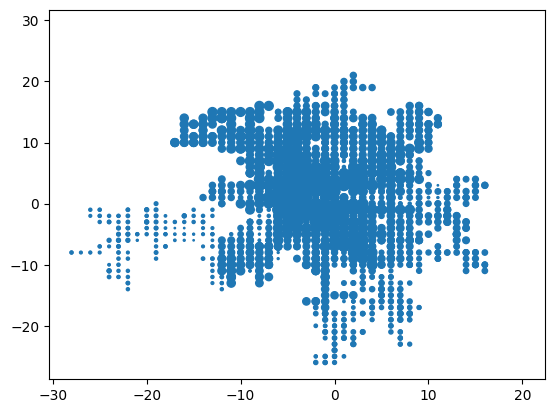

In [32]:
plt.scatter(run1.x, run1.y, run1.z)

In [33]:
from mpl_toolkits.mplot3d import Axes3D


In [64]:
%matplotlib

Using matplotlib backend: MacOSX


2023-03-20 14:06:07.662 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:07.689 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:07.702 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:07.715 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:07.728 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:07.741 python[26728:208

2023-03-20 14:06:08.305 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:08.318 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:08.331 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:08.349 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:08.365 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:08.383 python[26728:208

2023-03-20 14:06:10.391 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:10.447 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:10.502 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:10.558 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:10.617 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:10.672 python[26728:208

2023-03-20 14:06:12.209 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:12.266 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:12.321 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:12.375 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:12.433 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:12.490 python[26728:208

2023-03-20 14:06:13.084 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.097 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.110 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.124 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.137 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.150 python[26728:208

2023-03-20 14:06:13.704 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.717 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.739 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.752 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.764 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:13.777 python[26728:208

2023-03-20 14:06:14.324 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:14.338 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:14.351 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:14.364 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:14.376 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:14.389 python[26728:208

2023-03-20 14:06:16.178 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:16.235 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:16.289 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:16.344 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:16.401 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:16.456 python[26728:208

2023-03-20 14:06:17.923 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:17.937 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:17.956 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:17.970 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:17.985 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:17.998 python[26728:208

2023-03-20 14:06:18.764 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:18.782 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:18.802 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:18.820 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:18.836 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:18.855 python[26728:208

2023-03-20 14:06:19.610 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:19.622 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:19.635 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:19.648 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:19.661 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:19.674 python[26728:208

2023-03-20 14:06:20.228 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.241 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.254 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.267 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.281 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.295 python[26728:208

2023-03-20 14:06:20.841 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.855 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.869 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.883 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.897 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:20.910 python[26728:208

2023-03-20 14:06:21.469 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:21.483 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:21.496 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:21.510 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:21.523 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:21.537 python[26728:208

2023-03-20 14:06:22.089 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.102 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.116 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.130 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.145 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.159 python[26728:208

2023-03-20 14:06:22.720 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.734 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.748 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.761 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.775 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:22.789 python[26728:208

2023-03-20 14:06:23.345 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.358 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.371 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.385 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.398 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.412 python[26728:208

2023-03-20 14:06:23.965 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.978 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:23.991 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.004 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.016 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.029 python[26728:208

2023-03-20 14:06:24.593 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.612 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.628 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.646 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.664 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:24.682 python[26728:208

2023-03-20 14:06:25.440 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:25.454 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:25.473 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:25.490 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:25.508 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:25.527 python[26728:208

2023-03-20 14:06:26.302 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:26.322 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:26.335 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:26.352 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:26.370 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:26.389 python[26728:208

2023-03-20 14:06:27.156 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:27.175 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:27.195 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:27.208 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:27.225 python[26728:20871046] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-03-20 14:06:27.241 python[26728:208

In [62]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


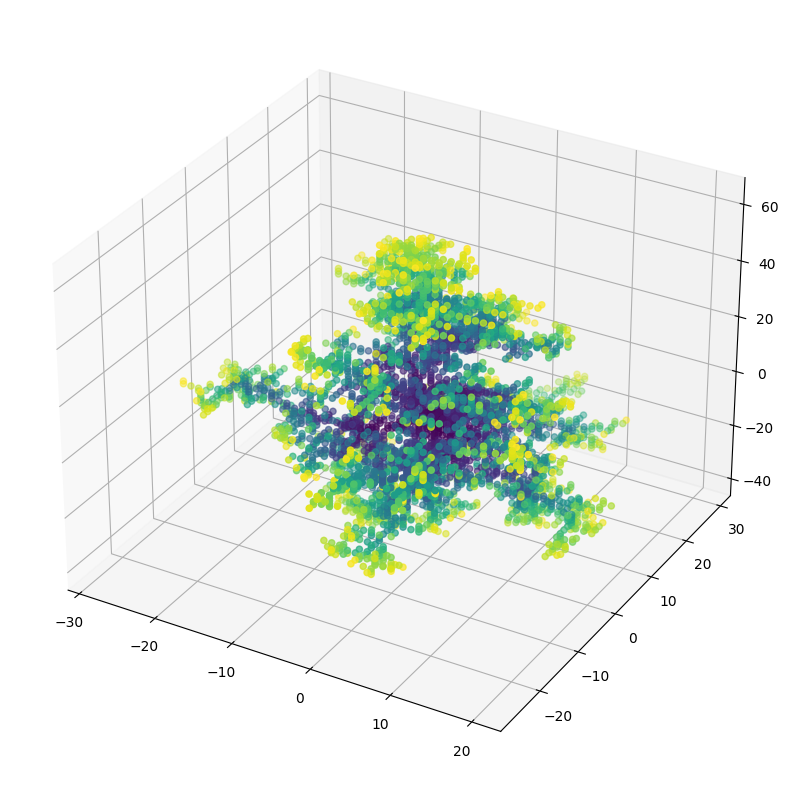

In [63]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(run1.x, run1.y,run1.z, c=run1.N)
fig

In [57]:
run1

x   y   z     N          r         cr        fd run
0      0   0   0     1   1.000000   1.000000       NaN   1
1      0   0   1     2   1.000000   1.000000       inf   1
2      0   1   0     3   1.847759   1.847759  1.789348   1
3      0   2   0     4   2.797933   2.797933  1.347381   1
4      0   0   2     5   1.000000   2.797933  1.564261   1
...   ..  ..  ..   ...        ...        ...       ...  ..
4995  -1  16  28  4996  16.794095  30.454843  2.492910   1
4996  -8 -13  -7  4997  16.238796  30.454843  2.492969   1
4997  15  21 -10  4998  26.793874  30.454843  2.493028   1
4998  -1  -2  59  4999   3.200413  30.454843  2.493086   1
4999  15  -9  18  5000  18.464591  30.454843  2.493145   1

[5000 rows x 8 columns]